In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings("ignore")
data=pd.read_excel("C:\\Users\\Utilisateur\\OneDrive\\BILAN_JOURNEE\\BILAN_JOURNEE_mai25.xlsx", index_col='Jour', parse_dates=True)

In [2]:
df=data.copy()
df=df.iloc[300:,:]
df['Somme réseaux']=df['Snap']+df['Insta']+df['Twitter']+df['BeReal']
ajd = datetime.today().date()
hier=ajd-timedelta(days=1)


    #Lendemain
df['Messe'].fillna(0,inplace=True)
df['Jour semaine'] = df.index.strftime('%A')
df['Numéro semaine']=df.index.isocalendar().week
df['Numéro jour']=df.index.day
df['Mois']=df.index.month
df['Année']=df.index.year
jours = {
    'Monday': 'lundi',
    'Tuesday': 'mardi',
    'Wednesday': 'mercredi',
    'Thursday': 'jeudi',
    'Friday': 'vendredi',
    'Saturday': 'samedi',
    'Sunday': 'dimanche'
    }

df['Jour semaine'] = df['Jour semaine'].map(jours)
jours_semaine_ordre = ['lundi', 'mardi', 'mercredi', 'jeudi', 'vendredi', 'samedi', 'dimanche']

df['Copains']=df['Copains'].map(lambda x: 1 if pd.notna(x) and x != '' else 0)
df['Activité?']=df['Activité'].map(lambda x: 1 if pd.notna(x) and x != '' else 0)
df['Transport?']=df['Transport'].map(lambda x: 1 if pd.notna(x) and x != '' else 0)
df['Match de sport?']=df['Match de sport'].map(lambda x: 1 if x==0 else 0)
df['Footing?']=df['Footing'].map(lambda x: 1 if x==0 else 0)

cols_presque_binaires=['Copains','Activité?', 'Transport?', 'Match de sport?','Footing?']

cols_binaires=["Lever direct",	"Lecture au petit-déj",	"A l'heure", "Parents","Laëtitia","Famille","Eugé","Sport","Ciné","Film","Docu",	"Restau","Fast food","Café/bar solo","Lecture dehors","Café/bar avec copains","Café/bar Eugé",
    "Repas copains","Vois copains","Soirée chill","Soirée","Dodo avec Eugé","Dodo en lisant","Dodo sans tel","Messe","Réveil sans tel (30 mn)", "CB","CP","Temps calme"]

        
for col in cols_binaires:
    df[f'{col}?'] = df[col].apply(lambda x: 'oui' if x == 1 else ('non' if x == 0 else np.nan))
df["A l'étranger ?"].fillna('non',inplace=True)
df["A l'étranger"]=df["A l'étranger ?"].apply(lambda x: 1 if x == 'oui' else (0 if x == 'non' else np.nan))

df['Dodo en lisant veille']=df['Dodo en lisant'].shift(1)
df['Dodo en lisant veille?']=df['Dodo en lisant?'].shift(1)

df['Dodo sans tel veille']=df['Dodo sans tel'].shift(1)
df['Dodo sans tel veille?']=df['Dodo sans tel?'].shift(1)

df['Heure lever'] = pd.to_datetime(df['Heure lever'], format='%H:%M:%S')
df['Heure réveil'] = pd.to_datetime(df['Heure réveil'], format='%H:%M:%S')
df['Heure dodo'] = pd.to_datetime(df['Heure dodo'], format='%H:%M:%S')
df['Heure dodo détecté'] = pd.to_datetime(df['Heure dodo détecté'], format='%H:%M:%S')
df['Début travail'] = pd.to_datetime(df['Début travail'], format='%H:%M:%S')
df['Heure footing'] = pd.to_datetime(df['Heure footing'], format='%H:%M:%S')
df['Temps lever']=(df['Heure lever'] - df['Heure réveil']).dt.total_seconds()/60

df['Lieu principal']=df['Lieu'].str.split('/').str[0]
order_box=['oui','non']
palette=sns.color_palette("Set2")

def categorie_note(note):
    if note >= 7:
        return "Bien (7-10)"
    elif note >= 6:
        return "Correct (6-6,5)"
    elif note <= 5.5:
        return "Mauvais (0-5,5)"
    else:
        return np.nan

df['Catégorie note'] = df['Note'].map(categorie_note)
df['Catégorie note lendemain']=df['Catégorie note'].shift(-1)
df['Note lendemain']=df['Note'].shift(-1)
colors=['#66CDAA', '#FFD700', '#FF7F7F']
color_mapping = {
    'Bien (7-10)': colors[0],  
    'Correct (6-6,5)': colors[1],  
    'Mauvais (0-5,5)': colors[2]  
    }

colors2 = ["#66c2a5", "#fc8d62"]
color_mapping2 = {
    'oui': colors2[0],  
    'non': colors2[1]}

dict_fatigue={'Très en forme':10,
              'En forme':8.75,
              'Assez en forme':7.5,
              'Correct':6.25,
              'Moyen':5,
              'Un peu fatigué':4,
              'Assez fatigué':3.5,
              'Fatigué':2.5,
              'Très fatigué':1.25}
    
df['Forme']=df['Fatigue'].map(dict_fatigue)
df['Forme lendemain']=df['Forme'].shift(-1)
df['Somme réseaux lendemain']=df['Somme réseaux'].shift(-1)


dict_meteo={'Très beau temps':10,                       
        'Beau temps':8.5,                            
        'Moyen':5,                             
        'Correct':6,                             
        'Pas mal':7,                              
        'Mauvais temps':3,                        
        'Médiocre':4,                             
        'Mi beau temps mi mauvais':5.5,                      
        'Très mauvais temps':2, 
        'Mi mauvais temps, mi pas mal':5,            
        'Mi beau temps mi moyen':6.5,                      
        'Mi beau temps mi médiocre':6,
        'Mi beau temps mi très mauvais temps':5, 
        'Mi correct mi mauvais':4.5,
        'Mi correct mi très beau':8,                 
        'Mi mauvais, mi très beau temps':6.5,            
        'Mi beau temps mi correct':7,              
        'Mi beau, mi mauvais, mi moyen':5.5,            
        'Beau temps, un peu moche':7,
        'Très beau temps, un peu moche':7.5,            
        'Mi médiocre, mi très mauvais temps':3,
        'Mi médiocre, mi correct':5,     
        'Mi moyen mi très beau':7.5,                  
        'Mi médiocre, mi très beau temps':7,
        'Beau temps, un peu mauvais':7,
        'Très beau temps, un peu mauvais':8,
        'Mi médiocre, mi pas mal':5.5,
        'Exécrable':1,
        'Neige':4,
        }
    
df['Météo num']=df['Météo'].map(dict_meteo)

dict_alimentation={'Très saine':10,
                  'Saine':8.5,
                  'Assez saine':7,
                  'Correct':6,
                  'Moyenne':5,
                  'Médiocre':4,
                  'Très moyenne':3,
                  'Mauvaise':1}  
df['Alimentation num']=df['Alimentation'].map(dict_alimentation)

dict_sucre={'Très peu':10,
                  'Un peu':8.5,
                  'Assez peu':7,
                  'Correct':6,
                  'Moyen':5,
                  'Pas mal':4,
                  'Beaucoup':2.5,
                  'Enorme':1}
df['Sucre num']=df['Sucre'].map(dict_sucre)

df['Travail']=df['Travail'].map(lambda x:0 if pd.isna(x) else x)
df['Sport']=df['Sport'].map(lambda x:0 if x==0 else 1)

df.head()

,Type,Lieu,A l'étranger ?,Télétravail?,Note,Résumé,Heure réveil,Heure lever,Heure dodo,Heure dodo détecté,...,Lieu principal,Catégorie note,Catégorie note lendemain,Note lendemain,Forme,Forme lendemain,Somme réseaux lendemain,Météo num,Alimentation num,Sucre num
Jour,,,,,,,,,,,,,,,,,,,,,
2024-02-06,Mission Sciencéthic,Nantes,non,NaN,6.5,"Me lève tard, me prépare assez rapidement, 35 ...",1900-01-01 09:50:00,NaT,1900-01-01 23:30:00,NaT,...,Nantes,"Correct (6-6,5)",Bien (7-10),8.5,NaN,NaN,107.0,4.0,NaN,NaN
2024-02-07,Mission Sciencéthic,Nantes,non,NaN,8.5,"Ne mets pas de réveil, CB, réponds aux message...",1900-01-01 09:00:00,NaT,1900-01-01 01:45:00,NaT,...,Nantes,Bien (7-10),"Correct (6-6,5)",6.5,NaN,NaN,57.0,2.0,NaN,NaN
2024-02-08,Mission Sciencéthic,Nantes,non,NaN,6.5,"Réveil tard chez Eugé, me douche rapidement à ...",1900-01-01 10:40:00,NaT,1900-01-01 02:00:00,NaT,...,Nantes,"Correct (6-6,5)","Correct (6-6,5)",6.5,NaN,NaN,68.0,3.0,NaN,NaN
2024-02-09,Mission Sciencéthic,Nantes,non,NaN,6.5,"Réveil tard, RU avec Eugé, on croise Saad et S...",1900-01-01 11:00:00,NaT,1900-01-01 00:30:00,NaT,...,Nantes,"Correct (6-6,5)",Bien (7-10),8.5,NaN,NaN,107.0,3.0,NaN,NaN
2024-02-10,Week-end,Nantes,non,NaN,8.5,"Réveil au lit, sur mon tel, CP, me lève du lit...",1900-01-01 11:00:00,NaT,1900-01-01 04:00:00,NaT,...,Nantes,Bien (7-10),Bien (7-10),8.0,NaN,NaN,97.0,3.0,NaN,NaN


In [3]:
for col in cols_presque_binaires:
    moyenne_na=1-df[col].isna().mean()
    print(f"{col} : {moyenne_na:.2f}")

Copains : 1.00
Activité? : 1.00
Transport? : 1.00
Match de sport? : 1.00
Footing? : 1.00


In [14]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
cols_continues=['Somme réseaux','Travail','Lecture']
df_cont=df[cols_continues]
df_cont_standardise=pd.DataFrame(data=scaler.fit_transform(df_cont[cols_continues]),index=df_cont.index,columns=df_cont.columns)

In [16]:
cols_binaires_ML=["A l'étranger",'Parents',
 'Eugé',
 'Sport',
 'Ciné',
 'Film',
 'Docu',
 'Restau',
 'Fast food',
 'Café/bar solo',
 'Lecture dehors',
 'Café/bar avec copains',
 'Repas copains',
 'Vois copains',
 'Soirée chill',
 'Soirée',
 'Dodo avec Eugé',
'Messe']

cols_presque_binaires_ML=['Copains','Activité?','Transport?','Match de sport?','Footing?']

cols_bases=['Jour semaine','Note','Type']

df_ML=df[cols_bases+cols_binaires_ML+cols_presque_binaires_ML]
df_ML=pd.merge(df_ML,df_cont_standardise,left_index=True,right_index=True)
#df_ML=df_ML.iloc[:-1,:]
df_ML

,Jour semaine,Note,Type,A l'étranger,Parents,Eugé,Sport,Ciné,Film,Docu,...,Dodo avec Eugé,Messe,Copains,Activité?,Transport?,Match de sport?,Footing?,Somme réseaux,Travail,Lecture
Jour,,,,,,,,,,,,,,,,,,,,,
2024-02-06,mardi,6.5,Mission Sciencéthic,0,0,1,1,0,0,0,...,1,0.0,1,0,0,1,0,-0.212528,0.251903,-0.391007
2024-02-07,mercredi,8.5,Mission Sciencéthic,0,0,1,0,0,0,0,...,1,0.0,1,1,0,1,1,1.464921,-0.816151,-0.778860
2024-02-08,jeudi,6.5,Mission Sciencéthic,0,0,1,0,1,0,0,...,0,0.0,1,0,0,1,1,-0.246762,-0.085377,-0.778860
2024-02-09,vendredi,6.5,Mission Sciencéthic,0,0,1,0,1,1,0,...,0,0.0,1,0,0,1,1,0.129808,-0.591297,-0.778860
2024-02-10,samedi,8.5,Week-end,0,0,1,0,0,0,0,...,1,0.0,1,0,0,0,1,1.464921,-0.816151,-0.778860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-06-15,dimanche,6.0,Week-end,1,0,1,1,0,1,0,...,1,0.0,0,0,0,1,0,-1.102603,-0.816151,-0.778860
2025-06-16,lundi,7.0,Mission Sciencéthic,1,0,1,0,0,1,0,...,1,0.0,0,0,0,1,1,-0.280996,1.780908,-0.778860
2025-06-17,mardi,7.0,Mission Sciencéthic,1,0,1,0,0,0,0,...,1,0.0,0,0,0,1,1,-0.623332,2.736535,-0.261723


In [17]:
for col in df_ML.isna():
    moyenne_na=1-df_ML[col].isna().mean()
    print(f"{col} : {moyenne_na:.2f}")

Jour semaine : 1.00
Note : 1.00
Type : 1.00
A l'étranger : 1.00
Parents : 1.00
Eugé : 1.00
Sport : 1.00
Ciné : 1.00
Film : 1.00
Docu : 1.00
Restau : 1.00
Fast food : 1.00
Café/bar solo : 1.00
Lecture dehors : 1.00
Café/bar avec copains : 1.00
Repas copains : 1.00
Vois copains : 1.00
Soirée chill : 1.00
Soirée : 1.00
Dodo avec Eugé : 1.00
Messe : 1.00
Copains : 1.00
Activité? : 1.00
Transport? : 1.00
Match de sport? : 1.00
Footing? : 1.00
Somme réseaux : 0.98
Travail : 1.00
Lecture : 1.00


In [18]:
df_ML = pd.get_dummies(df_ML, columns=['Jour semaine', 'Type'])
df_ML.dropna(inplace=True)

<Axes: ylabel='Jour'>

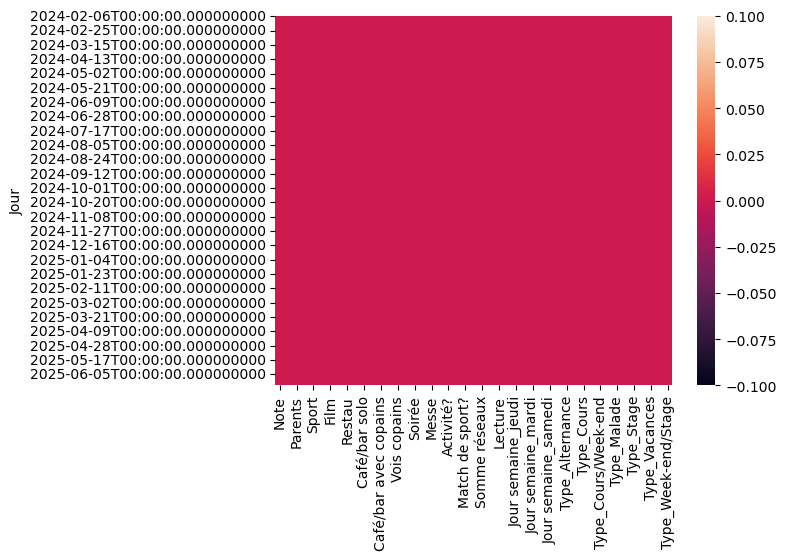

In [19]:
sns.heatmap(df_ML.isna())

In [20]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from xgboost import XGBRegressor

# Dictionnaire des modèles avec pipeline pour ceux qui nécessitent un StandardScaler
'''models = {
    'Linear Regression': make_pipeline(StandardScaler(), LinearRegression()),
    'Lasso': make_pipeline(StandardScaler(), Lasso()),
    'Ridge': make_pipeline(StandardScaler(), Ridge()),
    'K-Neighbors Regressor': make_pipeline(StandardScaler(), KNeighborsRegressor()),
    'Decision Tree Regressor': DecisionTreeRegressor(random_state=0),
    'Random Forest Regressor': RandomForestRegressor(random_state=0),
    'AdaBoost Regressor': AdaBoostRegressor(random_state=0),
    'XGBoost Regressor': XGBRegressor(random_state=0)
}'''
models = {
    'Linear Regression': LinearRegression(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'K-Neighbors Regressor': KNeighborsRegressor(),
    'Decision Tree Regressor': DecisionTreeRegressor(random_state=0),
    'Random Forest Regressor': RandomForestRegressor(random_state=0),
    'AdaBoost Regressor': AdaBoostRegressor(random_state=0),
    'XGBoost Regressor': XGBRegressor(random_state=0)
}

In [21]:
from sklearn.metrics import mean_absolute_error, median_absolute_error, mean_squared_error, r2_score

def regression_report(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    medae = median_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    r2 = r2_score(y_true, y_pred)
    
    report = {
        'MAE': mae.round(1),
        'MedAE': medae.round(1),
        'RMSE': rmse.round(1),
        'R²': r2.round(1)
    }

    for metric, value in report.items():
        print(f'{metric}: {value}')

In [22]:
from sklearn.model_selection import train_test_split

X=df_ML.drop('Note',axis=1)
y=df_ML['Note']
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=77)

LinearRegression()
MAE: 0.6
MedAE: 0.5
RMSE: 0.8
R²: 0.2


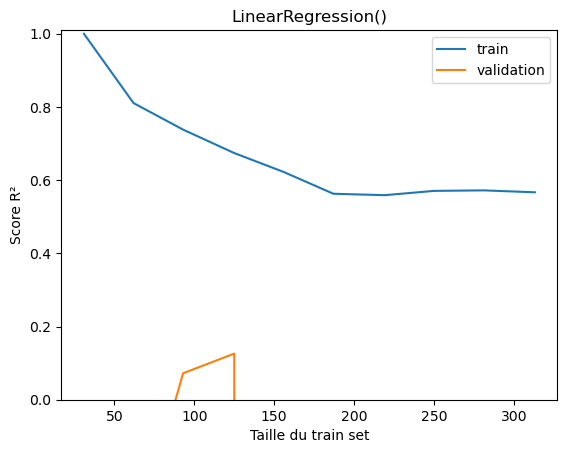

Lasso()
MAE: 0.7
MedAE: 0.3
RMSE: 0.9
R²: -0.1


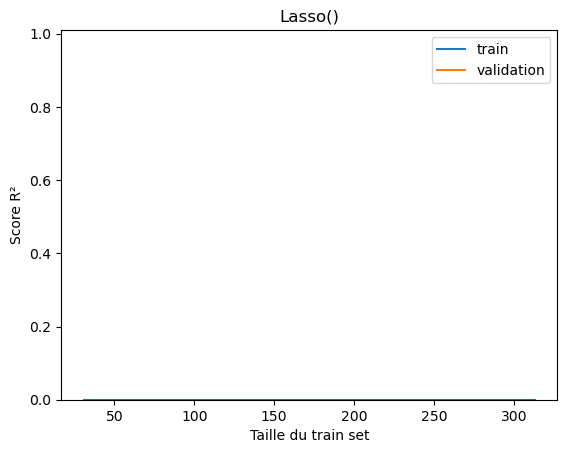

Ridge()
MAE: 0.6
MedAE: 0.5
RMSE: 0.7
R²: 0.3


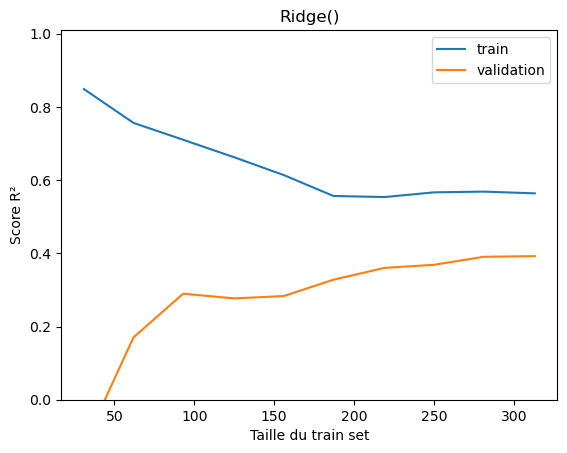

KNeighborsRegressor()
MAE: 0.6
MedAE: 0.5
RMSE: 0.8
R²: 0.1


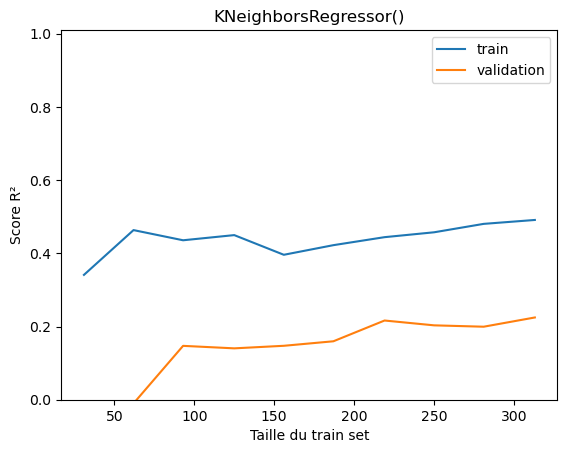

DecisionTreeRegressor(random_state=0)
MAE: 0.6
MedAE: 0.5
RMSE: 0.9
R²: 0.0


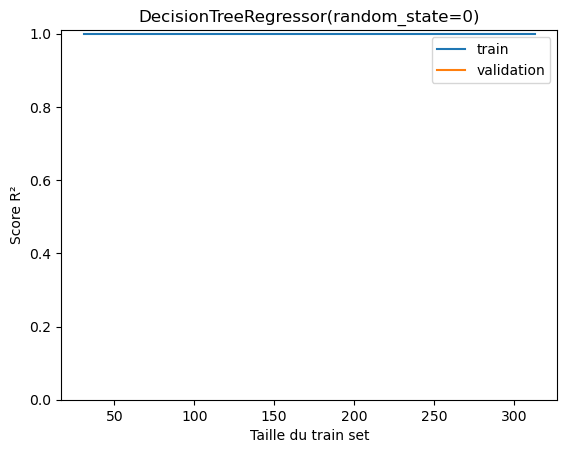

RandomForestRegressor(random_state=0)
MAE: 0.6
MedAE: 0.4
RMSE: 0.7
R²: 0.3


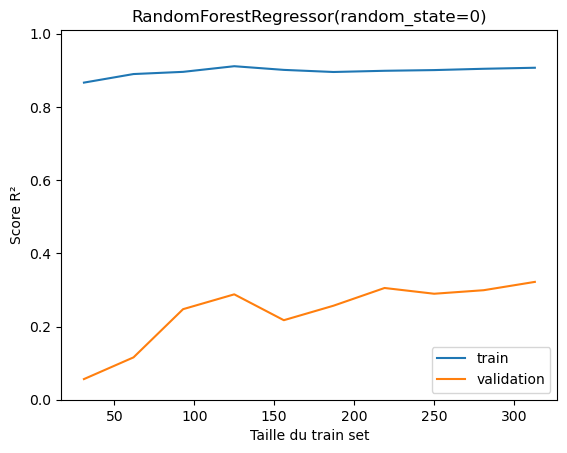

AdaBoostRegressor(random_state=0)
MAE: 0.6
MedAE: 0.5
RMSE: 0.8
R²: 0.2


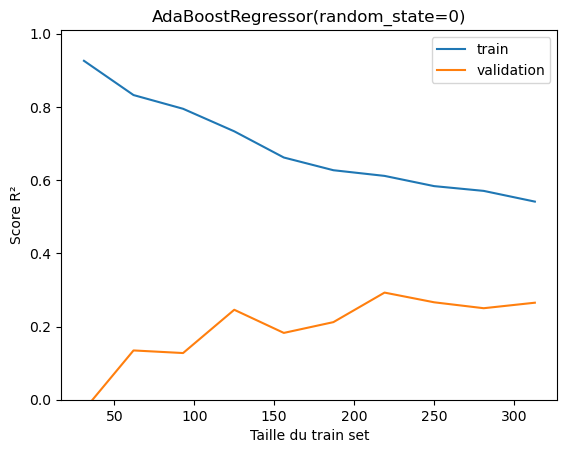

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=0, ...)
MAE: 0.6
MedAE: 0.4
RMSE: 0.8
R²: 0.2


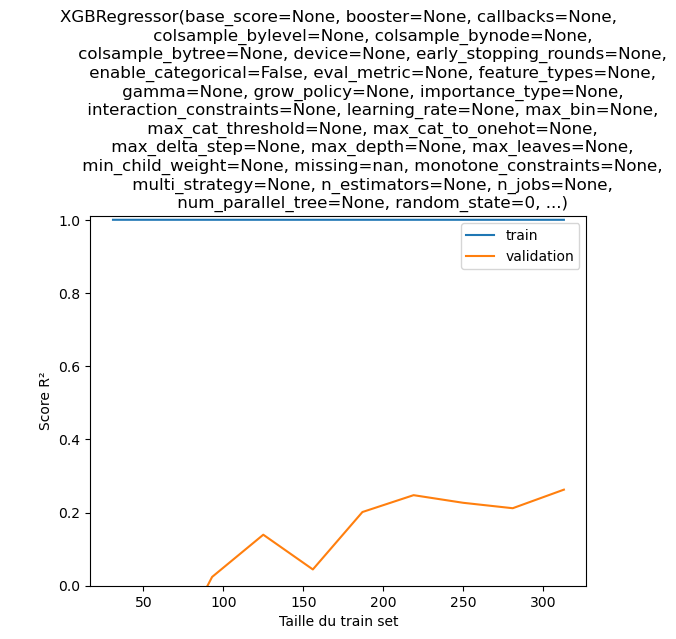

In [23]:
from sklearn.model_selection import learning_curve, KFold
kfold = KFold(n_splits=5, shuffle=True, random_state=77)

for model in models.values():
    plt.figure()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    N, train_score, val_score = learning_curve(model, X_train, y_train,
                                           train_sizes=np.linspace(0.1, 1, 10), cv=kfold, scoring='r2')
    print(model)
    regression_report(y_test,y_pred)
    plt.title(model)
    plt.plot(N, train_score.mean(axis=1), label='train')
    plt.plot(N, val_score.mean(axis=1), label='validation')
    plt.xlabel('Taille du train set')
    plt.ylabel('Score R²')
    plt.ylim(0,1.01)
    plt.legend()
    plt.show()

In [24]:
from lazypredict.Supervised import LazyRegressor
clf = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)

  0%|          | 0/42 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000240 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 246
[LightGBM] [Info] Number of data points in the train set: 392, number of used features: 20
[LightGBM] [Info] Start training from score 6.835459
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

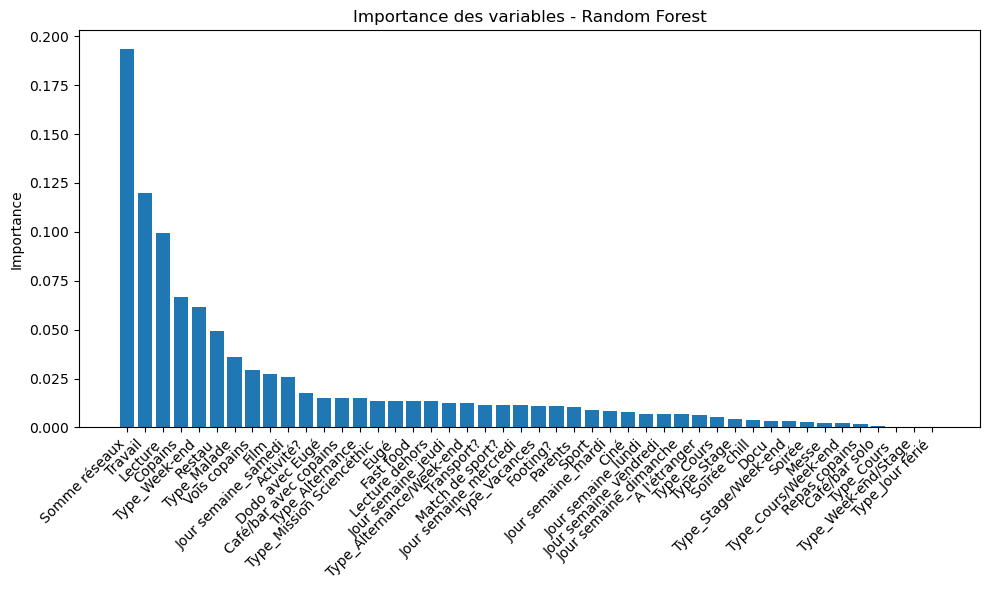

In [25]:
rf = RandomForestRegressor(random_state=0)
rf.fit(X_train, y_train)

# Récupération des importances
importances = rf.feature_importances_
features = X_train.columns if isinstance(X_train, pd.DataFrame) else [f"Feature {i}" for i in range(X_train.shape[1])]

# Tri par importance décroissante
indices = np.argsort(importances)[::-1]

# Affichage du graphique
plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), [features[i] for i in indices], rotation=45, ha='right')
plt.ylabel("Importance")
plt.title("Importance des variables - Random Forest")
plt.tight_layout()
plt.show()

In [26]:
for model in models.values():
    model.fit(X_train,y_train)
    plt.figure(figsize=(6,2))
    y_pred = model.predict(X_test)
    err_hist = np.abs(y_test - y_pred)
    plt.hist(err_hist, bins=30)
    plt.xlabel('Erreur absolue')
    plt.ylabel('Fréquence')
    plt.title(f"{model}")
    plt.show()

TypeError: 'numpy.ndarray' object is not callable